# Clustering: Hierarchical

## References

https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

## Import Python Libraries

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.utils import resample

## Global Variables

In [292]:
# random state 
random_state = 4781
# random_state = 7644

# colors
c_scale = 256
c1 = (1, 1, 1) # grey
c2 = (1, 0, 0) # red
c3 = (181/c_scale, 204/c_scale, 6/c_scale) # yellow
c4 = (6/c_scale, 122/c_scale, 204/c_scale) # blue
c5 = (0, 0, 0) # black
c6 = ["#fbfce6", "#a2daf2", "#ffc7c7", '#8e6a9e']
c7 = [(0, 0, 1), (0, 1 ,0), (1, 0, 0), (1, 1, 0)]

## Import Dataset

In [293]:
# Source: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X1: culmen_length_mm: culmen length (mm)
# X2: culmen_depth_mm: culmen depth (mm)
# X3: flipper_length_mm: flipper length (mm)
# X4: body_mass_g: body mass (g)
# X5: sex: penguin sex

In [294]:
# load dataset from github
filepath1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/penguins.csv'
df0 = pd.read_csv(filepath1, header = 0)
df0.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [295]:
# identify X_cols
X_cols = df0.columns
X_cols

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [296]:
# standardize column names
df1 = df0.copy()
zeros = len(str(len(X_cols)))
temp = (np.arange(0, len(X_cols)) + 1).astype('str')

X_cols = ['X' + i.zfill(zeros) for i in temp]
df1.columns = X_cols

df1.head()

,X1,X2,X3,X4,X5
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [297]:
# check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      342 non-null    float64
 1   X2      342 non-null    float64
 2   X3      342 non-null    float64
 3   X4      342 non-null    float64
 4   X5      335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [298]:
# describe data
df1.describe()

,X1,X2,X3,X4
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [299]:
# check missing values
df1.isna().sum()

X1    2
X2    2
X3    2
X4    2
X5    9
dtype: int64

In [300]:
# encode categorical values to numerical values
le = LabelEncoder()

categorical_cols = df1[X_cols].select_dtypes("object").columns
df1[categorical_cols] = df1[categorical_cols].apply(le.fit_transform)

df1.head()

,X1,X2,X3,X4,X5
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,NaN,NaN,NaN,NaN,3
4,36.7,19.3,193.0,3450.0,1


## Data Cleaning and Transformation

In [301]:
# predictor columns
X_cols = df1.columns
X_cols

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [302]:
# remove rows with missing valus
for X in df1.columns:
  cond1 = ~((df1[X].isna()))
  df1 = df1.loc[cond1,:]
  
df1.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

In [303]:
# # transform specific columns
# for X in df1.columns:
#   a = np.abs(df1[X].min()) + 1 + df1[X]
#   df1[X] = np.log(a)
  
#   df1[X]

In [304]:
# define X (feature matrix)
X = df1
X.head()

,X1,X2,X3,X4,X5
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [305]:
# normalize all X_cols
df2 = df1.copy()
norm = StandardScaler()
# norm = MinMaxScaler()
# norm = RobustScaler()
df2[X_cols] = norm.fit_transform(df2[X_cols])

df2.head()

,X1,X2,X3,X4,X5
0,-0.884499,0.785449,-0.126893,-0.564142,0.860265
1,-0.811126,0.126188,-0.107675,-0.501703,-0.978551
2,-0.664380,0.430462,-0.073083,-1.188532,-0.978551
4,-1.324737,1.089724,-0.080771,-0.938776,-0.978551
5,-0.847812,1.748985,-0.092301,-0.689020,0.860265


In [306]:
# inital row count
n0 = df2.shape[0]

# remove outliers from each column
for X in X_cols:
  cond1 = ~((df2[X] >= 2) | (df2[X] <= -2))
  df2 = df2.loc[cond1,:]

# new row count
n1 = df2.shape[0]

# rows removed
print('Rows removed = %d \n' %(n0-n1))
df2.info()

Rows removed = 30 

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      312 non-null    float64
 1   X2      312 non-null    float64
 2   X3      312 non-null    float64
 3   X4      312 non-null    float64
 4   X5      312 non-null    float64
dtypes: float64(5)
memory usage: 14.6 KB


## Visualize Dataset

In [307]:
# figure setup
fig_cols = 3
fig_rows = np.ceil(len(X_cols)/fig_cols).astype('int')
y_max = np.round(df2[X_cols].max().max(), 0)
y_min = np.round(df2[X_cols].min().min(), 0)
palette2 = [c3, c4]
figsize = (15, 15)

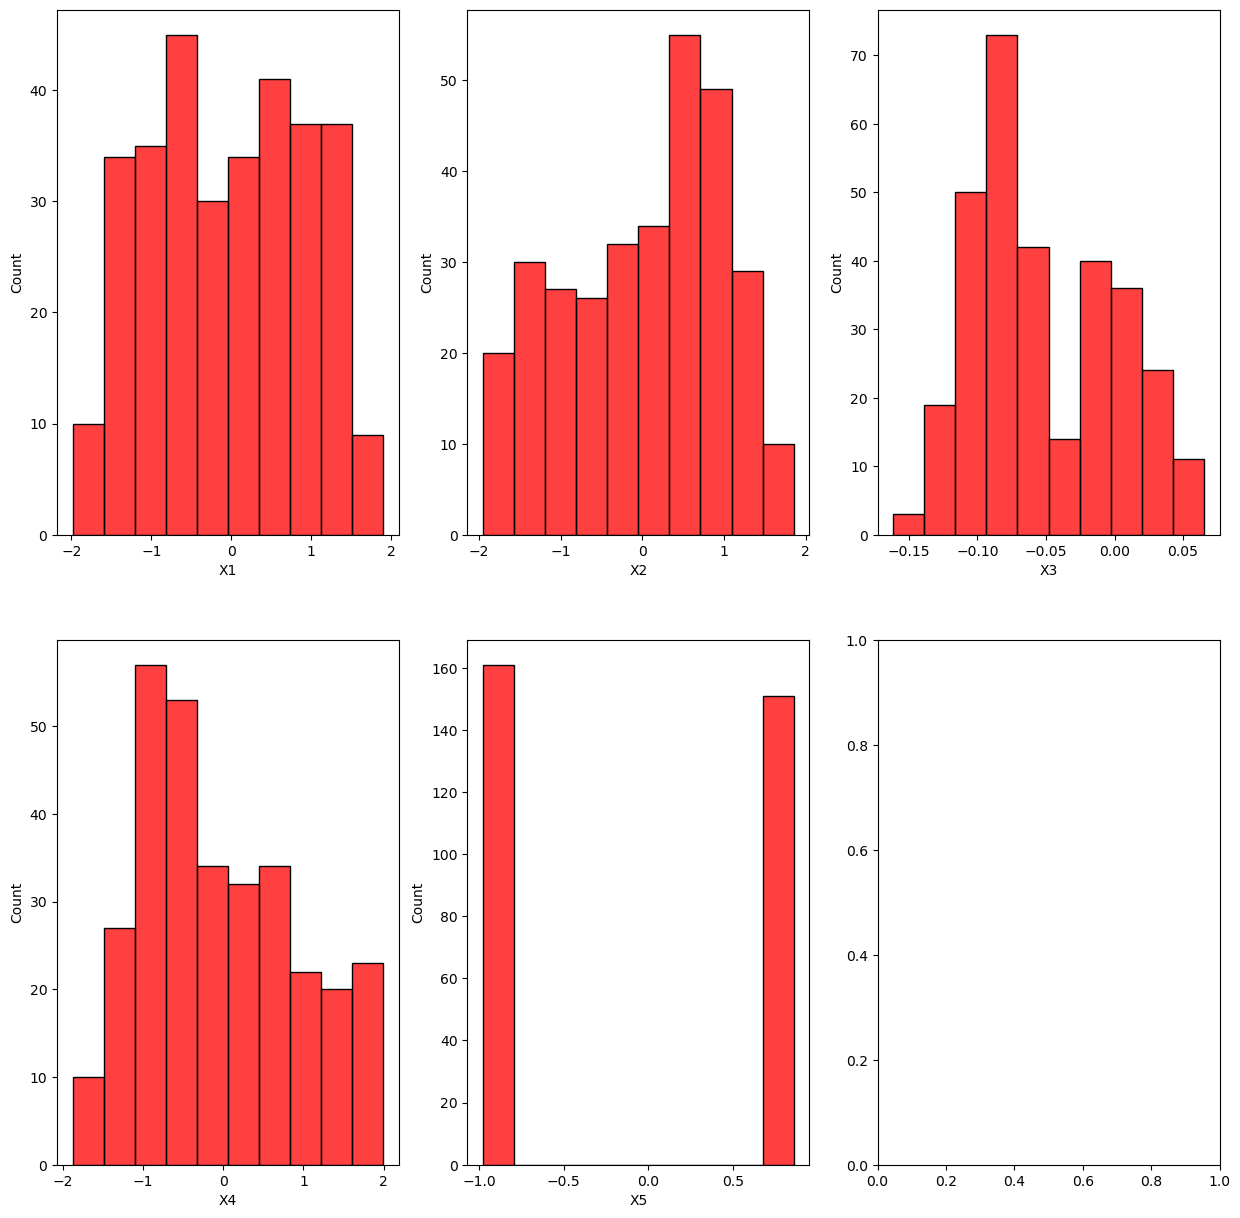

In [308]:
# subplot of y vs each X (stripplot + violinplot + boxenplot)
f1, axes = plt.subplots(fig_rows, fig_cols, figsize = figsize)
itr = 0
for x in X_cols:
  row = np.floor(itr/fig_cols) 
  row = row.astype('int')
  col = np.mod(itr, fig_cols)
  col = col.astype('int') 
  p1 = sns.histplot(ax = axes[row, col], data = df2, x = x, color = c2, linewidth = 1)
  axes[row, col].legend_ = None
  itr = itr + 1

## Train and Test ML Model

In [309]:
# define X - feature matrix
X = df2[X_cols]
X.head()

,X1,X2,X3,X4,X5
0,-0.884499,0.785449,-0.126893,-0.564142,0.860265
1,-0.811126,0.126188,-0.107675,-0.501703,-0.978551
2,-0.664380,0.430462,-0.073083,-1.188532,-0.978551
4,-1.324737,1.089724,-0.080771,-0.938776,-0.978551
5,-0.847812,1.748985,-0.092301,-0.689020,0.860265


In [310]:
# split data into train and test datasets
X_train, X_test = train_test_split(X,
  train_size = 0.8, random_state = random_state
)

In [311]:
# get principal components
pca = PCA(n_components = 2)

In [312]:
# fit principal components to training data
temp = pca.fit(X_train)

In [313]:
# pca explained variance ration
var_ratio = pca.explained_variance_ratio_
var_ratio.sum()

0.8454813776539742

In [314]:
# transform data based on principal components
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X = pca.transform(X)

In [326]:
# function to plot dendogram to select optimal number of clusters
def jra_plot_dendrogram(X, title, metric, method):
  # perform hierarchial clustering
  # Notes given [i, j]:
  # j = 1: Z[i, 0] cluster
  # j = 2: Z[i, 1] cluster
  # j = 2: distance between clusters Z[i, 0] and Z[i, 1]
  # j = 3: number of original observations in the newly formed cluster
  Z = linkage(X, method = method, metric = metric)
  cutoff = Z[:, 2].max() * 0.5
  dendrogram(Z, 
            orientation = 'top', 
            show_leaf_counts = True,
            color_threshold = cutoff, 
            above_threshold_color = c5, 
            #  distance_sort = 'ascending'
            distance_sort = 'descending'
            #  distance_sort = False
  )
  # clean up plot
  plt.title(title)
  plt.xlabel('X - Values')
  plt.ylabel('Distance / Disimilarity')
  plt.axhline(y = cutoff, color = c2, linestyle = '--', linewidth = 0.8)
  # plt.show()

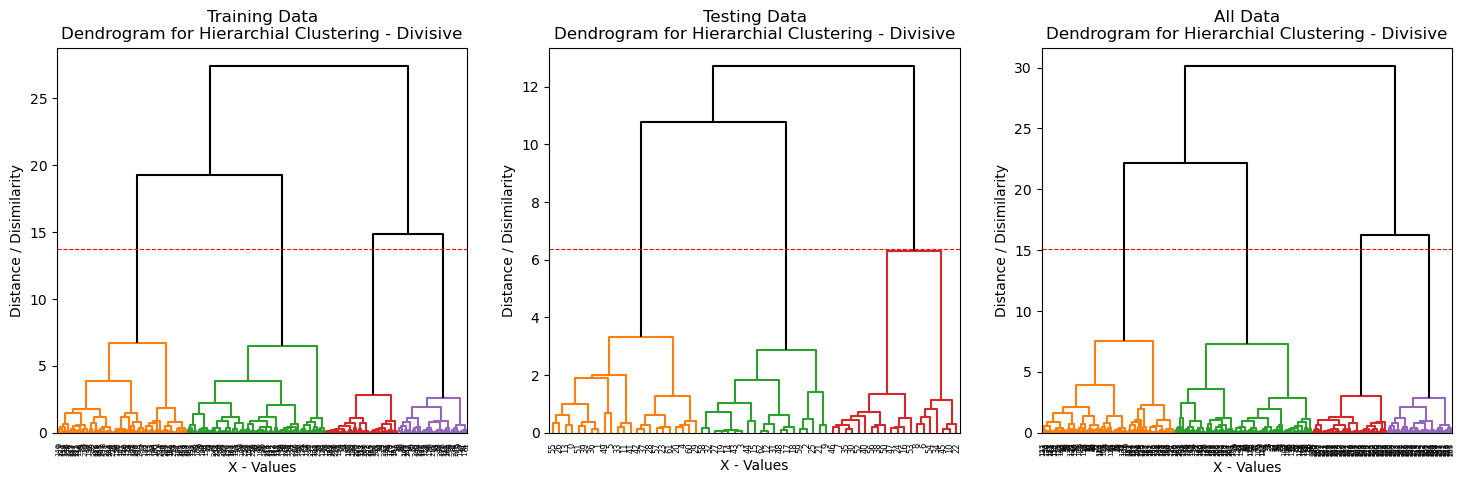

In [327]:
# plot dendrogrm for training and test to evaluate optimal (k) number of clusters
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
metric = 'euclidean'
method = 'ward'

# training data dendrogram
title = 'Training Data\nDendrogram for Hierarchial Clustering - Divisive'
plt.subplot(131)
jra_plot_dendrogram(X_train, title, metric = metric, method = method)

# testing data dendrogram
title = 'Testing Data\nDendrogram for Hierarchial Clustering - Divisive'
plt.subplot(132)
jra_plot_dendrogram(X_test, title, metric = metric, method = method)

# all data dendrogram
title = 'All Data\nDendrogram for Hierarchial Clustering - Divisive'
plt.subplot(133)
jra_plot_dendrogram(X, title, metric = metric, method = method)

In [331]:
# use agglomerative clusting to generate clusters based on optimal (k) clusters
k = 4
clustering_model = AgglomerativeClustering(
  n_clusters = k,
  metric = metric,
  linkage = method
)

In [334]:
# function to plot clusters
def jra_plot_clusters(X, clustering_model, title):
  
  # fit clustering model
  temp = clustering_model.fit(X)
  
  # get predicted labels
  y_hat = clustering_model.labels_.tolist()

  # initialize plot paramaters
  X1_values = X[:, 0]
  X2_values = X[:, 1]
  X1_min = X1_values.min() - 1
  X2_min = X2_values.min() - 1
  X1_max = X1_values.max() + 1
  X2_max = X2_values.max() + 1

  # plot clusters
  k = clustering_model.n_clusters_
  sns.scatterplot(x = X1_values, y = X2_values, hue = y_hat, palette = c7[0:k], s = 35)
  plt.title(title)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  # plt.show()

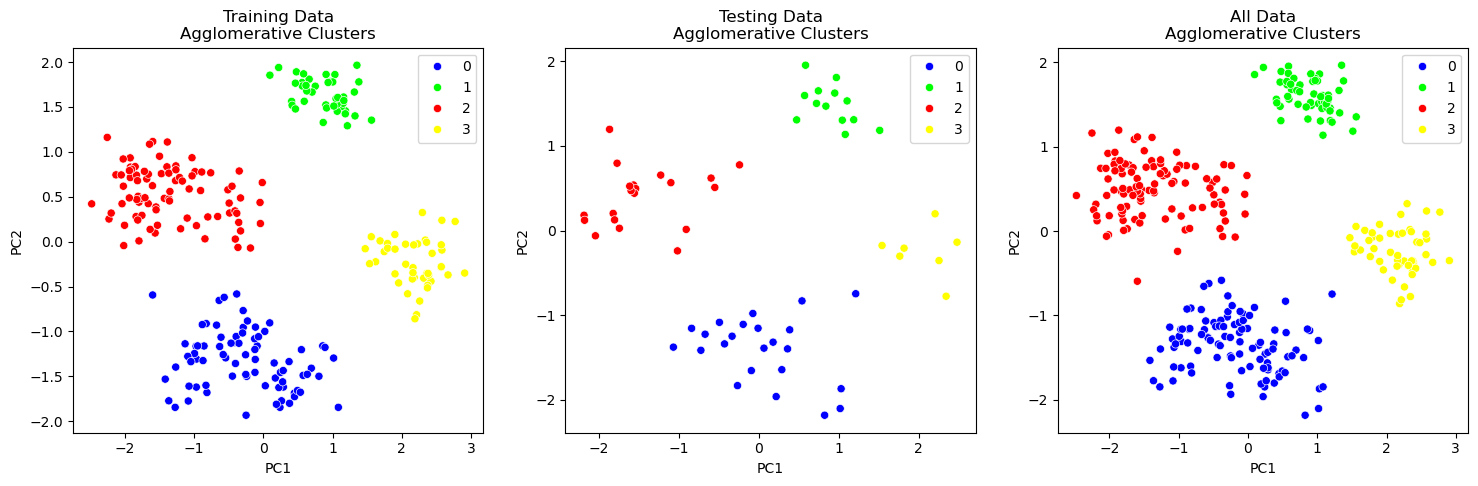

In [335]:
# plot clusters
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# training data clusters
title = 'Training Data\nAgglomerative Clusters'
plt.subplot(131)
jra_plot_clusters(X_train, clustering_model, title)

# # testing data clusters
title = 'Testing Data\nAgglomerative Clusters'
plt.subplot(132)
jra_plot_clusters(X_test, clustering_model, title)

# # all data clusters
title = 'All Data\nAgglomerative Clusters'
plt.subplot(133)
jra_plot_clusters(X, clustering_model, title)